<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/ML_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. What is Multilayer Perceptron (MLP) and Boltzmann Machine?**
*   MLP - one input, more hidden layers and one output
* Feedforward Architecture. Information flows the network in one direction
* MLPs are widely used for various tasks, including classification, regression, and pattern recognition.

---


  - Boltzman Machine is a simplified version of the MLP.
  - 2 layer model with a visible input layer and a hidden layer which makes stocastic decision
  - Boltzmann Machines and RBMs have been applied to various tasks, including dimensionality reduction, collaborative filtering, and feature learning.

In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)



prob = model.predict(X_test)

y_pred = np.argmax(prob)

# Evaluate the performance
print("Predicted Classes for New Data:", y_pred)



Epoch 1/50
3/3 - 2s - loss: 1.3126 - accuracy: 0.3333 - val_loss: 1.1770 - val_accuracy: 0.3333 - 2s/epoch - 690ms/step
Epoch 2/50
3/3 - 0s - loss: 1.2410 - accuracy: 0.3542 - val_loss: 1.1230 - val_accuracy: 0.3333 - 133ms/epoch - 44ms/step
Epoch 3/50
3/3 - 0s - loss: 1.1756 - accuracy: 0.4062 - val_loss: 1.0703 - val_accuracy: 0.4583 - 114ms/epoch - 38ms/step
Epoch 4/50
3/3 - 0s - loss: 1.1094 - accuracy: 0.4062 - val_loss: 1.0205 - val_accuracy: 0.5417 - 125ms/epoch - 42ms/step
Epoch 5/50
3/3 - 0s - loss: 1.0472 - accuracy: 0.4167 - val_loss: 0.9738 - val_accuracy: 0.5417 - 259ms/epoch - 86ms/step
Epoch 6/50
3/3 - 0s - loss: 0.9937 - accuracy: 0.4583 - val_loss: 0.9293 - val_accuracy: 0.6667 - 74ms/epoch - 25ms/step
Epoch 7/50
3/3 - 0s - loss: 0.9403 - accuracy: 0.6562 - val_loss: 0.8886 - val_accuracy: 0.8333 - 89ms/epoch - 30ms/step
Epoch 8/50
3/3 - 0s - loss: 0.8908 - accuracy: 0.7708 - val_loss: 0.8507 - val_accuracy: 0.8750 - 90ms/epoch - 30ms/step
Epoch 9/50
3/3 - 0s - loss: 0

**2. How can we relate standard deviation and variance?**
- Standard Deviation = square root of Variance
- St. deviation refers to the spread of the data from the mean.
- Variance is the average degree of all data points

In [9]:
import numpy as np

data =np.array([1,3,5,7,4,3,2])

variance= np.var(data)
std_deviation = np.sqrt(variance)

print(variance)
print(std_deviation)

3.3877551020408165
1.8405855323893037


**3. The Empiric Rule: 68- 95-99.7 or the three-sigma rule**
1. About 68% of the data falls within one standard deviation from the mean.

2. About 95% of the data falls within two standard deviations from the mean.

3. About 99.7% of the data falls within three standard deviations from the mean.

These rules are useful for understanding the distribution of data and identifying potential outliers. They are based on the assumption of a normal distribution.

**4. Is a high variance in data good or bad? And how to handle it?**
- Higher variance means the data spread is big and the features has a variety of data. It is usually bad.
- To handle high variance we can use, bagging algorithm
- Bagging algorithm splits the data intosubgroups with sampling replicated from random data
- Also, using Regularization (L1, L2), Cross-Validation, Feature Engineering, Ensemble methods can be used for handling

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples =200, n_features =1, noise =10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

alpha = 1 #Regularization strength

ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))



107.8532696410056


**5. Finding MSE using GridSearchCV (code)**

In [16]:
from sklearn.model_selection import GridSearchCV

alphas = [0.1, 0.5, 0.8, 1]

ridge_model = Ridge()
param_grid = {'alpha': alphas}

gr_search = GridSearchCV(ridge_model, param_grid, cv =5, scoring = 'neg_mean_squared_error')
gr_search.fit(X_train, y_train)

best_alpha = gr_search.best_params_['alpha']

best_ridge_model = Ridge(alpha = best_alpha).fit(X_train, y_train)

y_pred_best = best_ridge_model.predict(X_test)

print(mean_squared_error(y_test, y_pred_best))



108.37213936746555


**6. What is a Box-Cox transformation?**
- Box-Cox transformation is a power transform which transforms non-normal dependent variables into normal variables as normality is the most common assumption made while using many statistical techniques. It has a lambda parameter which when set to 0 implies that this transform is equivalent to log-transform. It is used for variance stabilization and also to normalize the distribution.
- It is used from scipy.stats

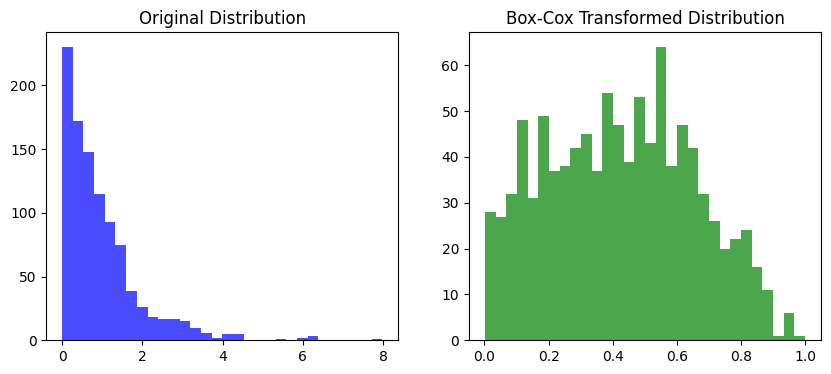

Optimal lambda value: -0.843751338053347


In [17]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

data = np.random.exponential(size=1000)

# Apply the Box-Cox transformation
transformed_data, lambda_value = boxcox(data + 1)  # Adding 1 to handle zero or negative values

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Distribution')

plt.show()

# Print the estimated lambda value
print("Optimal lambda value:", lambda_value)


**7. How Will You Know Which Machine Learning Algorithm to Choose for Your Classification Problem?**

There is no strict rule, but these guidelines we can use:
- If accuracy is concern, test different algorithms and cross validation
- If training data is small, use models with low variance and high bias
- If training data is large, high variance, low bias


**8. When do you use Classification over Regression?**
- When the target is caterogical (yes/no, estimating gender, type of color)
- Both of them belong to supervised machine learning algorithms
- When the target is continous: estimating sales and prices of a product, predicting the score of a team.

- We can use sklearn datasets to check (make_classification for classification, make_regression for regression)

In [8]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

X,y = make_classification(n_samples=10)

a,b = make_regression(n_samples = 10)

print(y)
print(b)

[1 1 1 0 0 0 0 0 1 1]
[  47.03321534  220.52449793  326.83346596 -195.32292231  -39.27618741
   55.64461199 -104.14368427  -32.15874667  -25.25736559   76.96244146]


**9. Can You mention some advantages and disadvantages of Decision Trees?**
- advantages: easy to interpret, robust to outliers, few parameters to tune
- disadvantages: prone to overfitting

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

**10. Explain the differences between Random Forest and Gradient Boosting machines**

- Random Forest (RF): RF is an ensemble method based on bagging. It builds multiple decision trees independently and combines their predictions through averaging (for regression) or voting (for classification).
- Gradient Boosting Machines (GBM): GBM, on the other hand, is an ensemble method based on boosting. It builds decision trees sequentially, with each tree correcting the errors of the previous one.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X,y = make_regression(n_samples = 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Random Forest Mean Squared Error: 11222.670286372868
Gradient Boosting Mean Squared Error: 14745.410304234038


11. What is a Fourier Transform?
- It is mathematical technique that transforms any function of time to a function of frequency.
- It is closely related to Fourier Series. It takes any time-based pattern for input and calculates the overall cycle offset, rotation speed and strength for all possible cycles.
- It is commonly used in Engineering, signal processing, image analysis

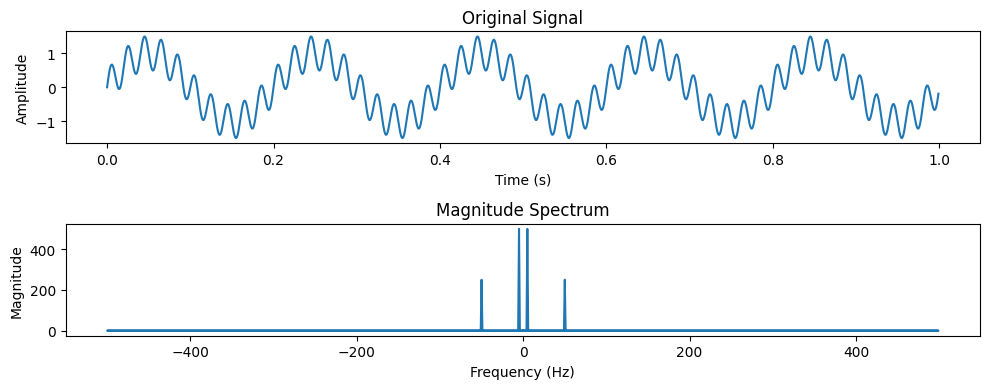

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
f1 = 5  # Frequency of the first sinusoid
f2 = 50  # Frequency of the second sinusoid
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Compute the Fourier Transform
freq = np.fft.fftfreq(len(signal), 1/fs)
fft_result = np.fft.fft(signal)

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
